In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
import math
from sklearn.model_selection import train_test_split
from geopy.distance import vincenty
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 19 columns):
id_code                        1284 non-null object
current_date                   1284 non-null object
current_time                   1284 non-null object
source_name                    1284 non-null object
destination_name               1284 non-null object
train_name                     1284 non-null object
target                         1284 non-null object
country_code_source            1283 non-null object
longitude_source               1283 non-null float64
latitude_source                1283 non-null float64
mean_halt_times_source         1283 non-null float64
country_code_destination       1251 non-null object
longitude_destination          1251 non-null float64
latitude_destination           1251 non-null float64
mean_halt_times_destination    1251 non-null float64
current_year                   1284 non-null int64
current_week                   1284 non-null int64
curre

In [3]:
df_train.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,isfywypmkqqhyft,2016-07-27,08:05:51 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
1,mqsfxyvuqpbwomk,2016-07-27,08:06:11 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
2,alspwwtbdvqsgby,2016-07-27,08:08:57 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
3,szitxhhqduyrqpg,2016-07-27,08:09:08 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
4,krisdqzczivvwcp,2016-07-27,08:11:01 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False


In [4]:
df_train.isnull().sum()

id_code                         0
current_date                    0
current_time                    0
source_name                     0
destination_name                0
train_name                      0
target                          0
country_code_source             1
longitude_source                1
latitude_source                 1
mean_halt_times_source          1
country_code_destination       33
longitude_destination          33
latitude_destination           33
mean_halt_times_destination    33
current_year                    0
current_week                    0
current_day                     0
is_weekend                      0
dtype: int64

In [5]:
df_train.describe()

,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week
count,1283.000000,1283.000000,1283.000000,1251.000000,1251.000000,1251.000000,1284.0,1284.000000
mean,4.292481,50.934674,278.061613,4.298829,50.924570,271.872701,2016.0,36.781153
std,0.552492,0.206194,228.954089,0.558849,0.296266,234.419223,0.0,3.175253
min,-0.126061,49.638463,0.000000,0.321070,43.455128,0.000000,2016.0,30.000000
25%,4.039653,50.845658,78.488439,4.014573,50.835707,71.193642,2016.0,36.000000
50%,4.360846,50.896456,180.598266,4.356801,50.891925,164.419075,2016.0,38.000000
75%,4.482785,51.056365,467.982659,4.482785,51.035896,421.644509,2016.0,39.000000
max,5.982265,51.925093,686.615607,6.958823,52.379128,686.615607,2016.0,40.000000


In [6]:
# percentage of missing values in each column
round(df_train.isnull().sum()/len(df_train.index), 2)*100

id_code                        0.0
current_date                   0.0
current_time                   0.0
source_name                    0.0
destination_name               0.0
train_name                     0.0
target                         0.0
country_code_source            0.0
longitude_source               0.0
latitude_source                0.0
mean_halt_times_source         0.0
country_code_destination       3.0
longitude_destination          3.0
latitude_destination           3.0
mean_halt_times_destination    3.0
current_year                   0.0
current_week                   0.0
current_day                    0.0
is_weekend                     0.0
dtype: float64

In [7]:
df_train = df_train.dropna(subset=['country_code_destination'])
df_train = df_train.dropna(subset=['country_code_source'])
df_train.isnull().sum()

id_code                        0
current_date                   0
current_time                   0
source_name                    0
destination_name               0
train_name                     0
target                         0
country_code_source            0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
country_code_destination       0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
dtype: int64

In [8]:
df_test.isnull().sum()

id_code                        0
current_date                   0
current_time                   0
source_name                    0
destination_name               0
train_name                     0
country_code_source            0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
country_code_destination       0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
dtype: int64

In [9]:
df_train.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
31,mgtoldpcbopaoba,2016-07-27,11:41:46 PM,station$130,station$214,ICWVYA,high,whber,4.360846,50.859663,640.265896,whber,4.482785,51.017648,306.523121,2016,30,Wednesday,False
32,hbvekntxnxearzq,2016-07-28,12:04:25 AM,station$248,station$248,ICZVXY,low,whber,5.497685,50.967057,39.476879,whber,5.497685,50.967057,39.476879,2016,30,Thursday,False
34,rfwvjolvzoekxsq,2016-07-28,12:18:09 AM,station$248,station$147,ICZVXY,low,whber,5.497685,50.967057,39.476879,whber,4.356801,50.845658,634.164740,2016,30,Thursday,False
35,jcbfhwsqzpcifpe,2016-07-28,12:38:28 AM,station$177,station$130,ICXUYS,high,whber,4.482076,50.896456,171.020231,whber,4.360846,50.859663,640.265896,2016,30,Thursday,False
36,qfnccvisvjzlkxg,2016-07-28,08:50:27 AM,station$544,station$147,ICZVAT,medium,whber,3.710675,51.035896,309.014451,whber,4.356801,50.845658,634.164740,2016,30,Thursday,False


In [10]:

def distance_calc (row):
    start = (row['latitude_source'], row['longitude_source'])
    stop = (row['latitude_destination'], row['longitude_destination'])

    return round((vincenty(start, stop).meters),2)

In [11]:
df_train['distance'] = df_train.apply (lambda row: distance_calc (row),axis=1)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


In [12]:
df_test['distance'] = df_test.apply (lambda row: distance_calc (row),axis=1)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


In [13]:
df_train.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,distance
31,mgtoldpcbopaoba,2016-07-27,11:41:46 PM,station$130,station$214,ICWVYA,high,whber,4.360846,50.859663,640.265896,whber,4.482785,51.017648,306.523121,2016,30,Wednesday,False,19553.96
32,hbvekntxnxearzq,2016-07-28,12:04:25 AM,station$248,station$248,ICZVXY,low,whber,5.497685,50.967057,39.476879,whber,5.497685,50.967057,39.476879,2016,30,Thursday,False,0.00
34,rfwvjolvzoekxsq,2016-07-28,12:18:09 AM,station$248,station$147,ICZVXY,low,whber,5.497685,50.967057,39.476879,whber,4.356801,50.845658,634.164740,2016,30,Thursday,False,81376.12
35,jcbfhwsqzpcifpe,2016-07-28,12:38:28 AM,station$177,station$130,ICXUYS,high,whber,4.482076,50.896456,171.020231,whber,4.360846,50.859663,640.265896,2016,30,Thursday,False,9463.31
36,qfnccvisvjzlkxg,2016-07-28,08:50:27 AM,station$544,station$147,ICZVAT,medium,whber,3.710675,51.035896,309.014451,whber,4.356801,50.845658,634.164740,2016,30,Thursday,False,50103.12


In [14]:
## removing the station term to make the column continous instead of categorical

df_train['source_name'] = df_train['source_name'].str.replace('station','')
df_train['destination_name'] = df_train['destination_name'].str.replace('station','')
df_train['source_name'] = df_train['source_name'].str.replace('$','')
df_train['destination_name'] = df_train['destination_name'].str.replace('$','')
df_train['source_name'].head()

31    130
32    248
34    248
35    177
36    544
Name: source_name, dtype: object

In [15]:
df_test['source_name'] = df_test['source_name'].str.replace('station','')
df_test['destination_name'] = df_test['destination_name'].str.replace('station','')
df_test['source_name'] = df_test['source_name'].str.replace('$','')
df_test['destination_name'] = df_test['destination_name'].str.replace('$','')
df_test['source_name'].head()

0    143
1    133
2    632
3    296
4    281
Name: source_name, dtype: object

In [16]:
df_train.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,distance
31,mgtoldpcbopaoba,2016-07-27,11:41:46 PM,130,214,ICWVYA,high,whber,4.360846,50.859663,640.265896,whber,4.482785,51.017648,306.523121,2016,30,Wednesday,False,19553.96
32,hbvekntxnxearzq,2016-07-28,12:04:25 AM,248,248,ICZVXY,low,whber,5.497685,50.967057,39.476879,whber,5.497685,50.967057,39.476879,2016,30,Thursday,False,0.00
34,rfwvjolvzoekxsq,2016-07-28,12:18:09 AM,248,147,ICZVXY,low,whber,5.497685,50.967057,39.476879,whber,4.356801,50.845658,634.164740,2016,30,Thursday,False,81376.12
35,jcbfhwsqzpcifpe,2016-07-28,12:38:28 AM,177,130,ICXUYS,high,whber,4.482076,50.896456,171.020231,whber,4.360846,50.859663,640.265896,2016,30,Thursday,False,9463.31
36,qfnccvisvjzlkxg,2016-07-28,08:50:27 AM,544,147,ICZVAT,medium,whber,3.710675,51.035896,309.014451,whber,4.356801,50.845658,634.164740,2016,30,Thursday,False,50103.12


In [17]:
df_train.country_code_source.unique()

array(['whber', 'wsluu', 'logbp', 'qwnll'], dtype=object)

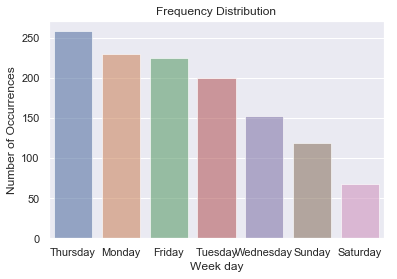

In [18]:
carrier_count = df_train['current_day'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.6)
plt.title('Frequency Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Week day', fontsize=12)
plt.show()

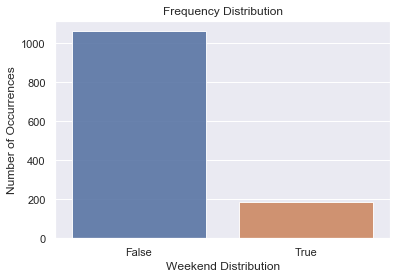

In [19]:
carrier_count = df_train['is_weekend'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Weekend Distribution', fontsize=12)
plt.show()

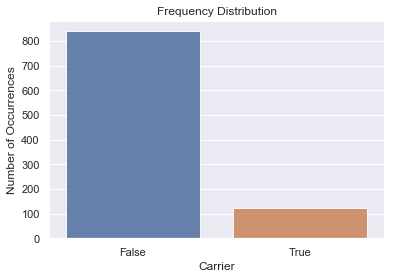

In [20]:
carrier_count = df_test['is_weekend'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

In [21]:

lb_make = LabelEncoder()
df_train['country_code_source'] = lb_make.fit_transform(df_train['country_code_source'])
df_train['country_code_destination'] = lb_make.fit_transform(df_train['country_code_destination'])
df_train['is_weekend'] = lb_make.fit_transform(df_train['is_weekend'])
df_train['current_day'] = lb_make.fit_transform(df_train['current_day'])
df_train['train_name'] = lb_make.fit_transform(df_train['train_name'])

df_train['id_code'] = lb_make.fit_transform(df_train['id_code'])
df_train.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,distance
31,566,2016-07-27,11:41:46 PM,130,214,72,high,2,4.360846,50.859663,640.265896,3,4.482785,51.017648,306.523121,2016,30,6,0,19553.96
32,334,2016-07-28,12:04:25 AM,248,248,336,low,2,5.497685,50.967057,39.476879,3,5.497685,50.967057,39.476879,2016,30,4,0,0.00
34,813,2016-07-28,12:18:09 AM,248,147,336,low,2,5.497685,50.967057,39.476879,3,4.356801,50.845658,634.164740,2016,30,4,0,81376.12
35,420,2016-07-28,12:38:28 AM,177,130,146,high,2,4.482076,50.896456,171.020231,3,4.360846,50.859663,640.265896,2016,30,4,0,9463.31
36,757,2016-07-28,08:50:27 AM,544,147,324,medium,2,3.710675,51.035896,309.014451,3,4.356801,50.845658,634.164740,2016,30,4,0,50103.12


In [22]:
df_test['country_code_source'] = lb_make.fit_transform(df_test['country_code_source'])
df_test['country_code_destination'] = lb_make.fit_transform(df_test['country_code_destination'])
df_test['is_weekend'] = lb_make.fit_transform(df_test['is_weekend'])
df_test['current_day'] = lb_make.fit_transform(df_test['current_day'])
df_test['train_name'] = lb_make.fit_transform(df_test['train_name'])

df_test['id_code'] = lb_make.fit_transform(df_test['id_code'])

In [23]:
df_train['current_time'] = pd.to_datetime(df_train['current_time']).dt.strftime('%H')
df_test['current_time'] = pd.to_datetime(df_test['current_time']).dt.strftime('%H')
df_train.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,distance
31,566,2016-07-27,23,130,214,72,high,2,4.360846,50.859663,640.265896,3,4.482785,51.017648,306.523121,2016,30,6,0,19553.96
32,334,2016-07-28,00,248,248,336,low,2,5.497685,50.967057,39.476879,3,5.497685,50.967057,39.476879,2016,30,4,0,0.00
34,813,2016-07-28,00,248,147,336,low,2,5.497685,50.967057,39.476879,3,4.356801,50.845658,634.164740,2016,30,4,0,81376.12
35,420,2016-07-28,00,177,130,146,high,2,4.482076,50.896456,171.020231,3,4.360846,50.859663,640.265896,2016,30,4,0,9463.31
36,757,2016-07-28,08,544,147,324,medium,2,3.710675,51.035896,309.014451,3,4.356801,50.845658,634.164740,2016,30,4,0,50103.12


In [24]:
df_train['current_month'] = pd.to_datetime(df_train['current_date']).dt.strftime('%m')
df_test['current_month'] = pd.to_datetime(df_test['current_date']).dt.strftime('%m')

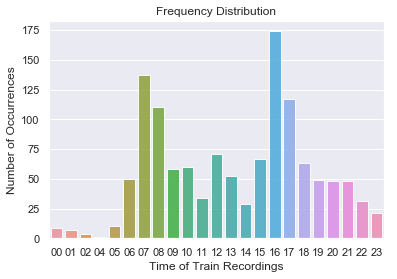

In [25]:

carrier_count = df_train['current_time'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Time of Train Recordings', fontsize=12)
plt.show()

#### As per above graphs most travel records are during the morning and evening shifts mostly between 6-10 morning and 4-7 evening which can be attributed to peak office hours.

In [26]:
df_train = df_train.drop(['longitude_source','longitude_destination','latitude_source','latitude_destination','current_year','current_date'], axis=1)
df_train.head()

,id_code,current_time,source_name,destination_name,train_name,target,country_code_source,mean_halt_times_source,country_code_destination,mean_halt_times_destination,current_week,current_day,is_weekend,distance,current_month
31,566,23,130,214,72,high,2,640.265896,3,306.523121,30,6,0,19553.96,07
32,334,00,248,248,336,low,2,39.476879,3,39.476879,30,4,0,0.00,07
34,813,00,248,147,336,low,2,39.476879,3,634.164740,30,4,0,81376.12,07
35,420,00,177,130,146,high,2,171.020231,3,640.265896,30,4,0,9463.31,07
36,757,08,544,147,324,medium,2,309.014451,3,634.164740,30,4,0,50103.12,07


In [27]:
df_test = df_test.drop(['longitude_source','longitude_destination','latitude_source','latitude_destination','current_year','current_date'], axis=1)
df_test.head()

,id_code,current_time,source_name,destination_name,train_name,country_code_source,mean_halt_times_source,country_code_destination,mean_halt_times_destination,current_week,current_day,is_weekend,distance,current_month
0,449,01,143,142,471,1,39.121387,2,39.121387,40,4,0,2130.01,10
1,7,01,133,147,171,1,95.676301,2,634.164740,40,4,0,4466.27,10
2,322,06,632,544,64,1,153.115607,2,309.014451,40,4,0,39200.96,10
3,292,07,296,281,83,1,87.130058,2,269.124277,40,4,0,2657.44,10
4,436,07,281,266,83,1,269.124277,2,351.916185,40,4,0,66535.80,10


In [28]:
footfall = {'high': 1,'low': 2, 'medium' : 3} 

In [29]:
df_train.target = [footfall[item] for item in df_train.target]

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 31 to 1283
Data columns (total 15 columns):
id_code                        1250 non-null int32
current_time                   1250 non-null object
source_name                    1250 non-null object
destination_name               1250 non-null object
train_name                     1250 non-null int32
target                         1250 non-null int64
country_code_source            1250 non-null int32
mean_halt_times_source         1250 non-null float64
country_code_destination       1250 non-null int32
mean_halt_times_destination    1250 non-null float64
current_week                   1250 non-null int64
current_day                    1250 non-null int32
is_weekend                     1250 non-null int64
distance                       1250 non-null float64
current_month                  1250 non-null object
dtypes: float64(3), int32(5), int64(3), object(4)
memory usage: 131.8+ KB


In [31]:
df_train['current_time'] = df_train['current_time'].astype(int)
df_train['source_name'] = df_train['source_name'].astype(int)
df_train['destination_name'] = df_train['destination_name'].astype(int)
df_train['current_month'] = df_train['current_month'].astype(int)

In [32]:
df_test['current_time'] = df_test['current_time'].astype(int)
df_test['source_name'] = df_test['source_name'].astype(int)
df_test['destination_name'] = df_test['destination_name'].astype(int)
df_test['current_month'] = df_test['current_month'].astype(int)

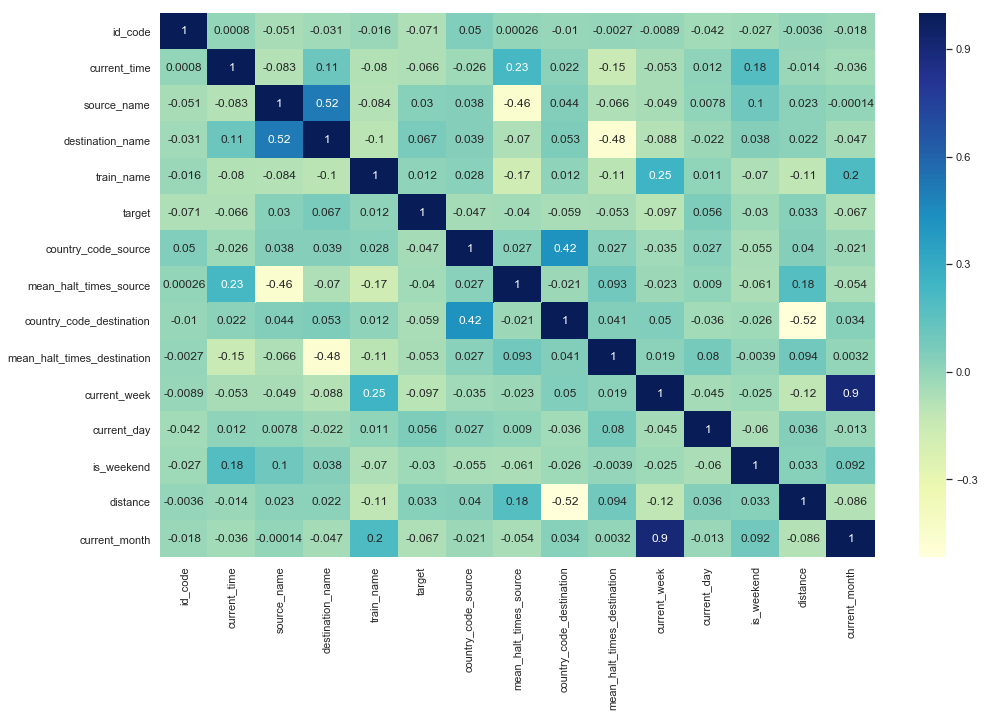

In [33]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Don't see any high correlations between the attributes

In [34]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train, test = train_test_split(df_train, train_size = 0.7, test_size = 0.3, random_state = 100)
train.head()

,id_code,current_time,source_name,destination_name,train_name,target,country_code_source,mean_halt_times_source,country_code_destination,mean_halt_times_destination,current_week,current_day,is_weekend,distance,current_month
859,928,18,108,130,456,1,2,102.765896,3,640.265896,39,1,0,4632.29,9
670,93,7,223,96,543,2,2,51.239884,3,130.413295,38,0,0,4142.32,9
928,572,23,250,241,326,1,2,37.953757,3,180.598266,39,5,0,16477.68,9
179,138,12,490,479,158,2,2,49.303468,3,55.445087,32,1,0,9513.15,8
1034,513,16,544,525,43,3,2,309.014451,3,164.419075,39,4,0,38966.56,9


In [35]:
y_train = train.pop('target')
X_train = train

X_test= test.drop('target', axis=1)
y_test= test['target']

In [36]:

# Define model
dtr_model = DecisionTreeRegressor()

# Fit model
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [37]:
print(X_train.head())
print("The predictions are")
print(dtr_model.predict(X_train.head()))

      id_code  current_time  source_name  destination_name  train_name  \
859       928            18          108               130         456   
670        93             7          223                96         543   
928       572            23          250               241         326   
179       138            12          490               479         158   
1034      513            16          544               525          43   

      country_code_source  mean_halt_times_source  country_code_destination  \
859                     2              102.765896                         3   
670                     2               51.239884                         3   
928                     2               37.953757                         3   
179                     2               49.303468                         3   
1034                    2              309.014451                         3   

      mean_halt_times_destination  current_week  current_day  is_weekend  \
859 

In [38]:


# Show model results of training set
y_hat = dtr_model.predict(X_train)
mae = metrics.mean_absolute_error(y_train,y_hat)
mse = metrics.mean_squared_error(y_train,y_hat)
print ("TRAINING SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", dtr_model.score(X_train,y_train))
print ("feature_importances:",dtr_model.feature_importances_)
print ("n_features:         ",dtr_model.n_features_)
print ("n_outputs:          ",dtr_model.n_outputs_)

TRAINING SET
MAE:                 0.0
RMSE:                0.0
r2:                  1.0
feature_importances: [0.19464168 0.09356568 0.07087473 0.11275786 0.14311683 0.
 0.056396   0.         0.05750122 0.07438934 0.05133242 0.01582457
 0.12286728 0.00673239]
n_features:          14
n_outputs:           1


In [39]:
### running the alogrithms on test data.
y_hat = dtr_model.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", dtr_model.score(X_test,y_test))

TEST SET
MAE:                 0.6613333333333333
RMSE:                0.9797958971132712
r2:                  -0.6779357661330414


### As per above data..considering the r2 is negative..running random forest to check the improvements, if any.

In [40]:

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [41]:
# fit
rfc.fit(X_train,y_train)
# Making predictions
predictions = rfc.predict(X_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
# Importing classification report and confusion matrix from sklearn metrics

# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.48      0.58      0.52       114
           2       0.65      0.70      0.68       160
           3       0.39      0.26      0.31       101

    accuracy                           0.54       375
   macro avg       0.51      0.51      0.50       375
weighted avg       0.53      0.54      0.53       375



In [43]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [44]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   29.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [45]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.4868571428571429 using {'min_samples_split': 200, 'min_samples_leaf': 100, 'n_estimators': 300, 'max_depth': 4, 'max_features': 10}


In [46]:

rfcModel = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [47]:

rfcModel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
predictions = rfcModel.predict(X_test)

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.39      0.42      0.40       114
           2       0.52      0.81      0.63       160
           3       0.00      0.00      0.00       101

    accuracy                           0.47       375
   macro avg       0.30      0.41      0.35       375
weighted avg       0.34      0.47      0.39       375



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:

mae = metrics.mean_absolute_error(y_test,predictions)
mse = metrics.mean_squared_error(y_test,predictions)
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", rfc.score(X_test,y_test))

TEST SET
MAE:                 0.648
RMSE:                0.9451631252505217
r2:                  0.544


In [51]:
# fit model no training data
xgbModel = xgb.XGBClassifier()
xgbModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
y_pred = xgbModel.predict(X_test)

In [53]:
predictions = [round(value) for value in y_pred]

In [54]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 51.47%


In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.44      0.46      0.45       114
           2       0.63      0.71      0.67       160
           3       0.36      0.27      0.31       101

    accuracy                           0.51       375
   macro avg       0.48      0.48      0.47       375
weighted avg       0.50      0.51      0.50       375



In [56]:
# Fit the grid search to the data
model = xgb.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 53.71% (5.61%)


In [57]:
results

array([0.62222222, 0.4494382 , 0.49425287, 0.47126437, 0.51724138,
       0.57471264, 0.5862069 , 0.56321839, 0.59770115, 0.49425287])

In [58]:
#from sklearn.svm import SVC 
#svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
#svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
#accuracy = svm_model_linear.score(X_test, y_test) 

In [60]:
# creating a confusion matrix 
#cm = confusion_matrix(y_test, svm_predictions) 

In [69]:
df_test['target'] = xgbModel.predict(df_test) ##xgbModel

In [70]:
reverse_footfall = {1: 'high',2 : 'low', 3: 'medium'} 
df_test.target = [reverse_footfall[item] for item in df_test.target]

In [71]:
df_test['id_code'] = lb_make.inverse_transform(df_test['id_code'])

In [72]:
df_results = df_test[['id_code','target']]

In [74]:
df_results.head()
df_results.to_csv('ashutosh_tiwari_hitachi_2.csv',index=False)


In [66]:
df_train.to_csv('retrain.csv',index=False)

In [75]:
df_results.head()

,id_code,target
0,mckbezdplrukagl,low
1,agxwrnbmzbyxsjg,high
2,iqjojyewdyfshtj,medium
3,hssqexnzirioaag,medium
4,lublknpfraiznhr,high
